# Correlations + Plots

In [32]:
a = np.random.normal(0, 0.1, 100)
b = np.random.normal(1, 0.1, 100)

array([1.01466193, 1.07994367, 0.87487339, 1.06396002, 0.88746615,
       0.92896294, 1.00549809, 1.11077143, 1.03975122, 1.08165033,
       0.97508368, 1.00143119, 0.96001095, 1.06727627, 0.99030344,
       0.91776295, 0.96393951, 0.99552318, 1.00586823, 1.01459629,
       1.06719946, 1.19045466, 0.9640894 , 0.91312278, 1.15061958,
       0.93600964, 1.13125673, 1.12694685, 0.94172949, 0.99216172,
       1.06878978, 1.11506188, 0.9887191 , 1.15898025, 1.00772716,
       0.8982868 , 0.98579217, 1.01169421, 1.01981096, 0.89409391,
       1.05102118, 1.13723556, 1.02074628, 0.92044804, 1.06746461,
       0.86585483, 1.14807631, 1.07126552, 1.14823487, 1.07698288,
       0.84039591, 0.94733353, 1.07230654, 0.93838515, 0.93105573,
       1.13612251, 0.90103739, 1.11607234, 0.95536876, 0.95159109,
       0.78852124, 1.04239178, 1.02847447, 0.93907257, 1.14935386,
       0.8977824 , 0.9508048 , 0.90703067, 1.00556006, 0.98825585,
       0.95663679, 1.03028431, 1.06489806, 1.05185905, 0.98520

In [1]:
import torch
import numpy as np

import pickle
import glob
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
%matplotlib inline

import itertools
import pandas as pd
pd.set_option('display.max_rows', None)

device = torch.device("cpu")
if torch.cuda.is_available():
    print('CUDA is available!')
    device = torch.device("cuda")
else:
    print('CUDA is not available...')

CUDA is available!


# Load Data

In [2]:
root_dir = 'C:/Users/Fabrice/Documents/GitHub/diversity_attacks/'

In [69]:
# all_results = []
# for file in glob.glob(root_dir + "assets/*"):
#     with open(file, 'rb') as handle:
#         data = pickle.load(handle)
#         try:
#             x = [r.pop('inputs') for r in data]
#         except:
#             pass
#         try:
#             x = [r.pop('targets') for r in data]
#         except:
#             pass
#         try:
#             x = [r.pop('classes') for r in data]
#         except:
#             pass
#         try:
#             x = [r.pop('adversaries') for r in data]
#         except:
#             pass
    
#     file = file.strip(root_dir)[:-15]
#     print(file, len(data))
#     idx = [i for i, c in enumerate(file) if c.isupper()][0]
#     model_name = file[idx:]
#     for r in data:
#         r['model'] = model_name 
#         try:
#             r['attack_success_rate'] = 1 - r['pert_acc']
#         except:
#             pass
#         try:
#             r['output_bias'] = 1 - r['output_diversity_pct']
#         except:
#             pass
        
#     all_results.append(data)

In [70]:
# all_results = list(itertools.chain.from_iterable(all_results))

In [71]:
# pickle.dump(all_results, open(root_dir + 'assets/all_metadata_2020.02.19.pkl', "wb"))

In [3]:
with open(root_dir + 'assets/all_metadata_2020.02.19.pkl', 'rb') as handle:
    all_results = pickle.load(handle)

In [4]:
target_features = ['model',
                   'attack',
                   'confidence',
                   'epsilon',
                   'regularization_weight',
                   'orig_acc',
                   'pert_acc',
                   'attack_success_rate',
                   'neuron_coverage_000',
                   'neuron_coverage_020',
                   'neuron_coverage_050',
                   'neuron_coverage_075',
                   'inception_score',
                   'fid_score_64',
                   'fid_score_2048',
                   'output_diversity',
                   'output_diversity_pct',
                   'output_bias']

In [9]:
df = pd.DataFrame(all_results)[target_features]
df['attack'].replace('NA', np.NaN, inplace=True)
df = df[pd.notnull(df['attack'])]

In [10]:
df['regularization_weight'] = pd.to_numeric(df['regularization_weight'], errors='coerce')
df['orig_acc'] = pd.to_numeric(df['orig_acc'], errors='coerce')
df['pert_acc'] = pd.to_numeric(df['pert_acc'], errors='coerce')
df['attack_success_rate'] = pd.to_numeric(df['attack_success_rate'], errors='coerce')
df['fid_score_64'] = pd.to_numeric(df['fid_score_64'], errors='coerce')
df['fid_score_2048'] = pd.to_numeric(df['fid_score_2048'], errors='coerce')
df['output_diversity'] = pd.to_numeric(df['output_diversity'], errors='coerce')
df['output_diversity_pct'] = pd.to_numeric(df['output_diversity_pct'], errors='coerce')
df['output_bias'] = pd.to_numeric(df['output_bias'], errors='coerce')

In [11]:
df

model                     attack  confidence  epsilon  \
0       DenseNet121             cw_div4_attack         0.0      NaN   
1       DenseNet121             cw_div4_attack        20.0      NaN   
2       DenseNet121             cw_div4_attack        40.0      NaN   
3       DenseNet121             cw_div4_attack         0.0      NaN   
4       DenseNet121             cw_div4_attack        20.0      NaN   
5       DenseNet121             cw_div4_attack        40.0      NaN   
6       DenseNet121             cw_div4_attack         0.0      NaN   
7       DenseNet121             cw_div4_attack        20.0      NaN   
8       DenseNet121             cw_div4_attack        40.0      NaN   
9       DenseNet121             cw_div4_attack         0.0      NaN   
10      DenseNet121             cw_div4_attack        20.0      NaN   
11      DenseNet121             cw_div4_attack        40.0      NaN   
12      DenseNet121             cw_div4_attack         0.0      NaN   
13      DenseNet121             cw_div4_attack        20.0      NaN   
14      DenseNet121             cw_div4_attack        40.0      NaN   
15      DenseNet121             cw_div4_attack         0.0      NaN   
16      DenseNet121             cw_div4_attack        20.0      NaN   
17      DenseNet121             cw_div4_attack        40.0      NaN   
18      DenseNet121             cw_div4_attack         0.0      NaN   
19      DenseNet121             cw_div4_attack        20.0      NaN   
20      DenseNet121             cw_div4_attack        40.0      NaN   
21      DenseNet121             cw_div4_attack         0.0      NaN   
22      DenseNet121             cw_div4_attack        20.0      NaN   
23      DenseNet121             cw_div4_attack        40.0      NaN   
24      DenseNet121             cw_div4_attack         0.0      NaN   
25      DenseNet121             cw_div4_attack        20.0      NaN   
26      DenseNet121             cw_div4_attack        40.0      NaN   
27      DenseNet121             cw_div4_attack         0.0      NaN   
28      DenseNet121             cw_div4_attack        20.0      NaN   
29      DenseNet121             cw_div4_attack        40.0      NaN   
30      DenseNet121             cw_div4_attack         0.0      NaN   
31      DenseNet121             cw_div4_attack        20.0      NaN   
32      DenseNet121             cw_div4_attack        40.0      NaN   
33      DenseNet121             cw_div4_attack         0.0      NaN   
34      DenseNet121             cw_div4_attack        20.0      NaN   
35      DenseNet121             cw_div4_attack        40.0      NaN   
36      DenseNet121             cw_div4_attack         0.0      NaN   
37      DenseNet121             cw_div4_attack        20.0      NaN   
38      DenseNet121             cw_div4_attack        40.0      NaN   
39      DenseNet121             cw_div4_attack         0.0      NaN   
40      DenseNet121             cw_div4_attack        20.0      NaN   
41      DenseNet121             cw_div4_attack        40.0      NaN   
42      DenseNet121             cw_div4_attack         0.0      NaN   
43      DenseNet121             cw_div4_attack        20.0      NaN   
44      DenseNet121             cw_div4_attack        40.0      NaN   
45      DenseNet121             cw_div4_attack         0.0      NaN   
46      DenseNet121             cw_div4_attack        20.0      NaN   
47      DenseNet121             cw_div4_attack        40.0      NaN   
48      DenseNet121             cw_div4_attack         0.0      NaN   
49      DenseNet121             cw_div4_attack        20.0      NaN   
50      DenseNet121             cw_div4_attack        40.0      NaN   
51      DenseNet121             cw_div4_attack         0.0      NaN   
52      DenseNet121             cw_div4_attack        20.0      NaN   
53      DenseNet121             cw_div4_attack        40.0      NaN   
54      DenseNet121             cw_div4_attack         0.0      NaN   
55      DenseNet121             cw_div

# Correlations

In [12]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [13]:
model_attacks = df[['model', 'attack']].drop_duplicates().values

In [14]:
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]
    print(model, attack)

DenseNet121 cw_div4_attack
ResNet56 cw_div4_attack
Conv1DNet cw_div4_attack
Conv2DNet cw_div4_attack
FCNet10 cw_div4_attack
FCNet5 cw_div4_attack
DenseNet121 pgd_attack
ResNet56 pgd_attack
Dave_norminit pgd_attack_reg
Dave_orig pgd_attack_reg
Rambo LinfPGDAttack_w_Diversity
Conv1DNet pgd_attack
Conv2DNet pgd_attack
FCNet10 pgd_attack
FCNet5 pgd_attack


In [15]:
# df.to_clipboard(excel=True)

In [16]:
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]
    
    print("Model: {0:15} Attack: {1}".format(model, attack))
    
    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    # #.to_clipboard(excel=True)
    # print(df[model_filter & attack_filter]) 
    # print(df[model_filter & attack_filter].corr())
    # print(calculate_pvalues(df[model_filter & attack_filter]))

Model: DenseNet121     Attack: cw_div4_attack
Model: ResNet56        Attack: cw_div4_attack
Model: Conv1DNet       Attack: cw_div4_attack
Model: Conv2DNet       Attack: cw_div4_attack
Model: FCNet10         Attack: cw_div4_attack
Model: FCNet5          Attack: cw_div4_attack
Model: DenseNet121     Attack: pgd_attack
Model: ResNet56        Attack: pgd_attack
Model: Dave_norminit   Attack: pgd_attack_reg
Model: Dave_orig       Attack: pgd_attack_reg
Model: Rambo           Attack: LinfPGDAttack_w_Diversity
Model: Conv1DNet       Attack: pgd_attack
Model: Conv2DNet       Attack: pgd_attack
Model: FCNet10         Attack: pgd_attack
Model: FCNet5          Attack: pgd_attack


# Plots

In [20]:
import seaborn as sns

sns.set("paper", rc={"font.size":20,
                     "axes.titlesize":25,
                     "axes.labelsize":20,
                     "lines.linewidth":2,
                     "lines.markersize":5,
                     "xtick.labelsize":14,
                     "ytick.labelsize":14}) 

sns.set_style("white")
plt.rc("axes", labelweight="normal")

In [21]:
from scipy import stats
def pearson_r(x, y):
    return stats.pearsonr(x, y)[0]

Model: DenseNet121     Attack: cw_div4_attack            Correlation: -0.21207315621814823
Model: ResNet56        Attack: cw_div4_attack            Correlation: 0.5879725700336965
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: nan
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: -0.2025035526893912
Model: FCNet10         Attack: cw_div4_attack            Correlation: 0.7632206427232546
Model: FCNet5          Attack: cw_div4_attack            Correlation: -0.22952027901254007
Model: DenseNet121     Attack: pgd_attack                Correlation: 0.17586894314872498
Model: ResNet56        Attack: pgd_attack                Correlation: 0.5126601108388572
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: -0.053656164523223374
Model: Dave_orig       Attack: pgd_attack_reg            Correlation: 3.459081268966647e-15
Model: Rambo           Attack: LinfPGDAttack_w_Diversity Correlation: -0.3996222509657029
Model: Conv1DNet       

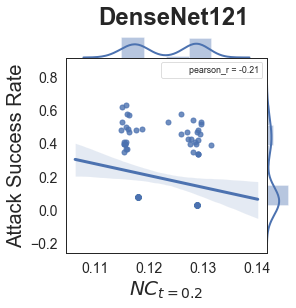

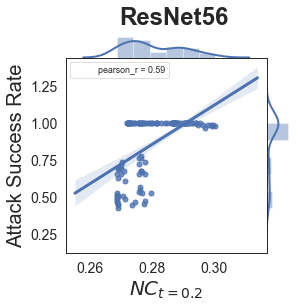

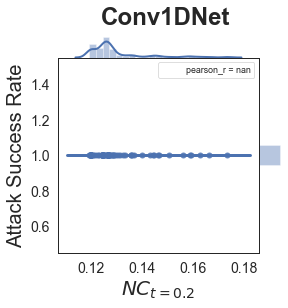

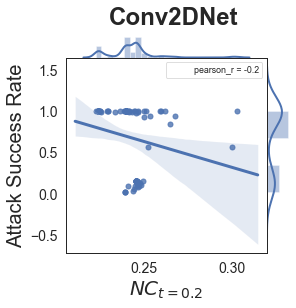

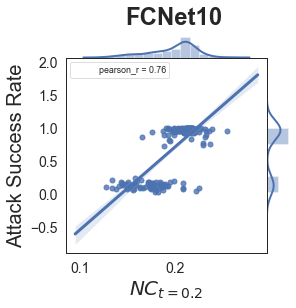

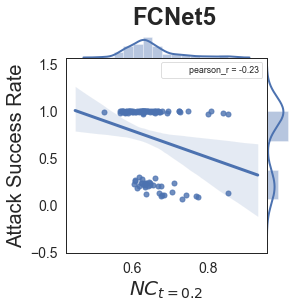

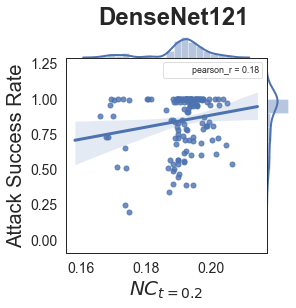

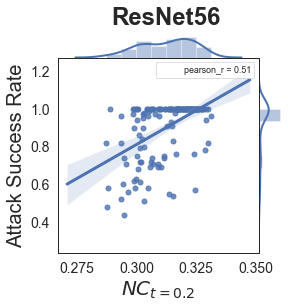

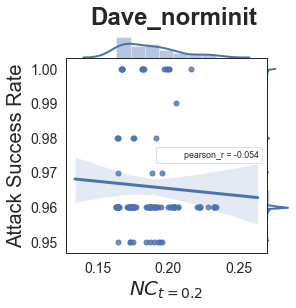

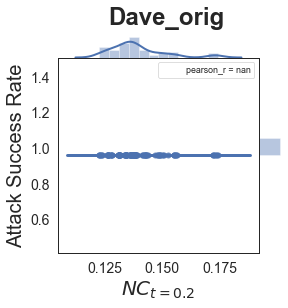

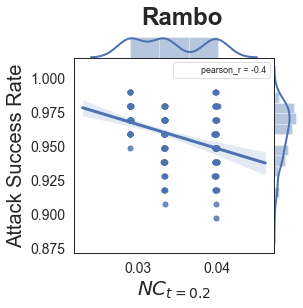

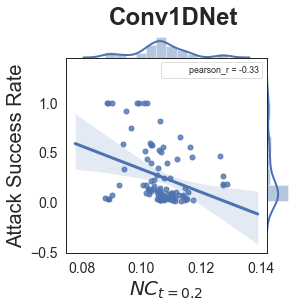

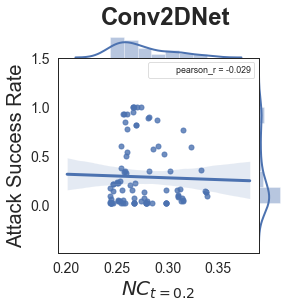

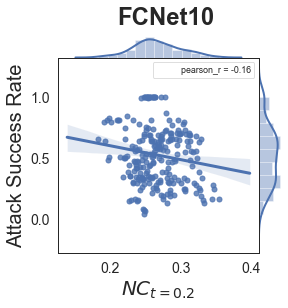

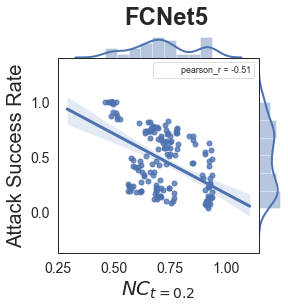

In [23]:
# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'attack_success_rate']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))    
    
    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "attack_success_rate", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,
                           # xlim=(0, 1), 
                           # ylim=(0, 1.3)
                          )

        ax.set_axis_labels('$NC_{t=0.2}$', 'Attack Success Rate')

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig(root_dir + 'imgs/nc_020+asr+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: 0.7310723147551234
Model: ResNet56        Attack: cw_div4_attack            Correlation: -0.8708005545000961
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: 0.5172841117650668
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: 0.1344908567812983
Model: FCNet10         Attack: cw_div4_attack            Correlation: -0.08801981515773052
Model: FCNet5          Attack: cw_div4_attack            Correlation: 0.5316450481129593
Model: DenseNet121     Attack: pgd_attack                Correlation: 0.15568278969937588
Model: ResNet56        Attack: pgd_attack                Correlation: -0.38326859769844923
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: -0.45846844068795567
Model: Dave_orig       Attack: pgd_attack_reg            Correlation: -0.5104297567108635
Model: Rambo           Attack: LinfPGDAttack_w_Diversity Correlation: -0.8199637848017522
Model: Conv

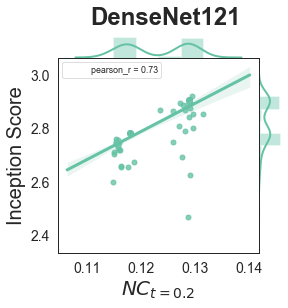

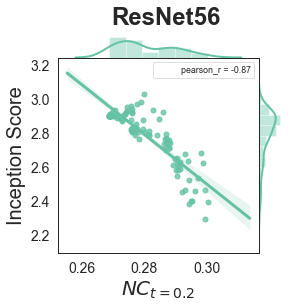

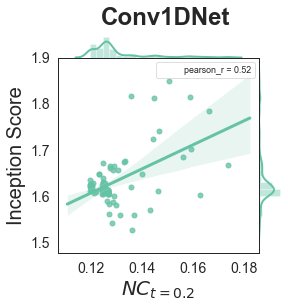

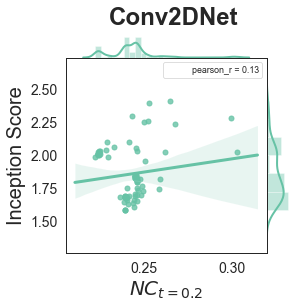

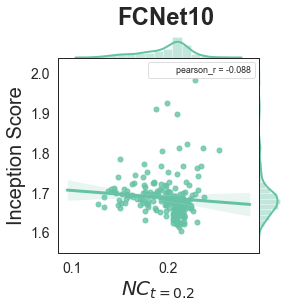

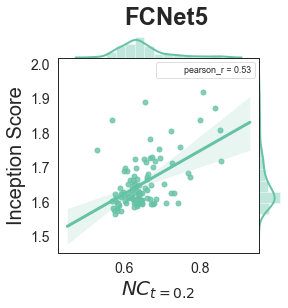

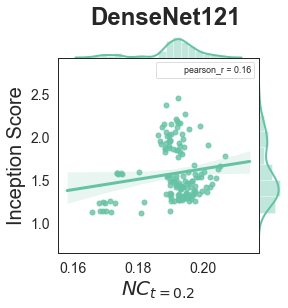

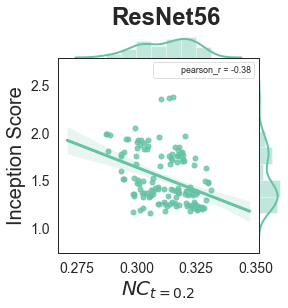

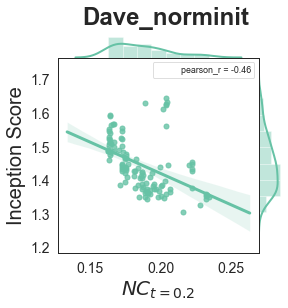

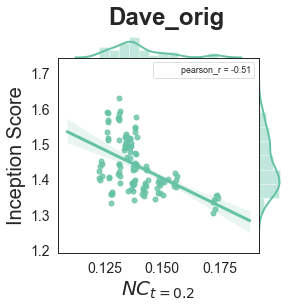

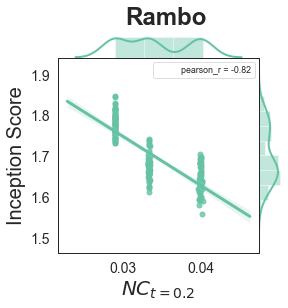

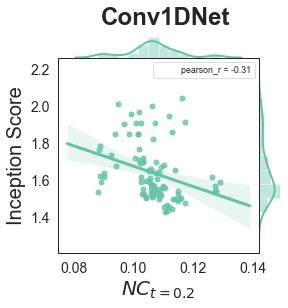

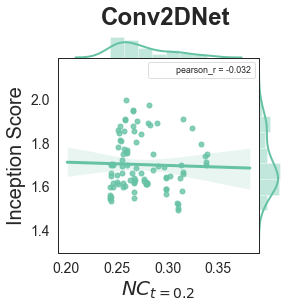

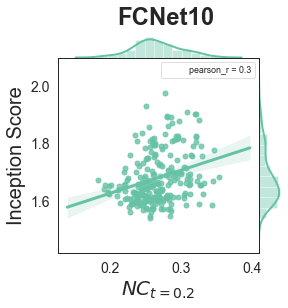

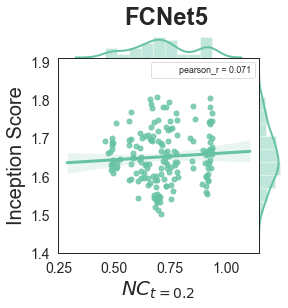

In [24]:
sns.set_palette(sns.color_palette("Set2"))

# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'inception_score']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "inception_score", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,
                           # xlim=(0, 1), 
                           #ylim=(0, 1.3)
                          )

        ax.set_axis_labels('$NC_{t=0.2}$', 'Inception Score') 

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig(root_dir + 'imgs/nc_020+is+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: 0.13498929668713835
Model: ResNet56        Attack: cw_div4_attack            Correlation: 0.7557664804084979
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: 0.5966511039857487
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: -0.19183537235107806
Model: FCNet10         Attack: cw_div4_attack            Correlation: 0.6364881203483592
Model: FCNet5          Attack: cw_div4_attack            Correlation: 0.17320590043482828
Model: DenseNet121     Attack: pgd_attack                Correlation: -0.055605566092875244
Model: ResNet56        Attack: pgd_attack                Correlation: 0.42568437680340926
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: 0.7010189601167013
Model: Dave_orig       Attack: pgd_attack_reg            Correlation: 0.4059442141894573
Model: Rambo           Attack: LinfPGDAttack_w_Diversity Correlation: 0.9985813903689464
Model: Conv1D

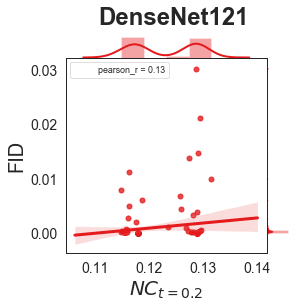

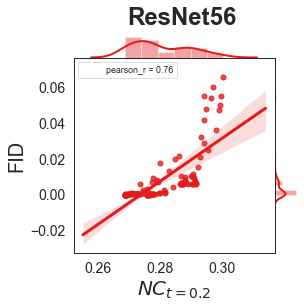

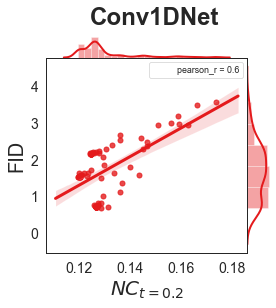

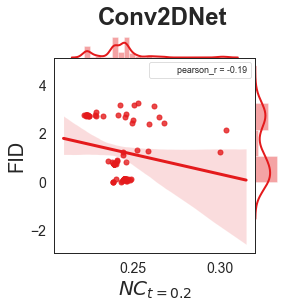

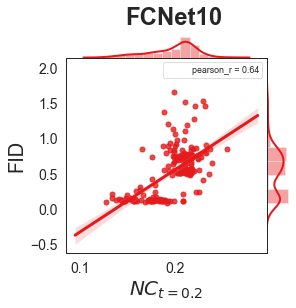

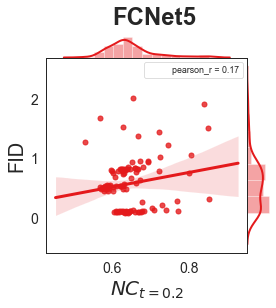

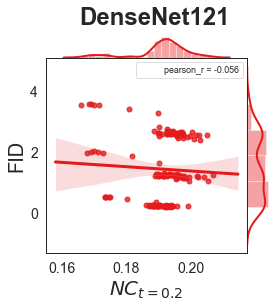

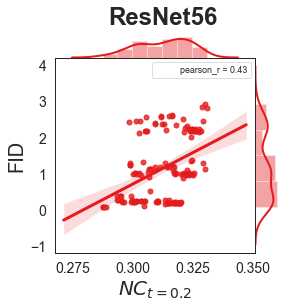

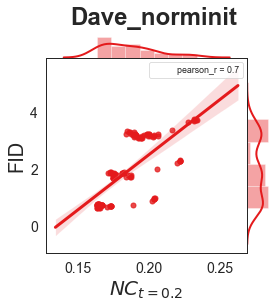

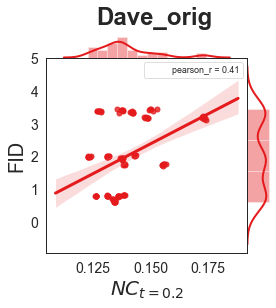

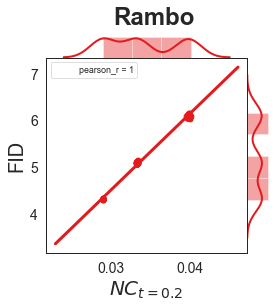

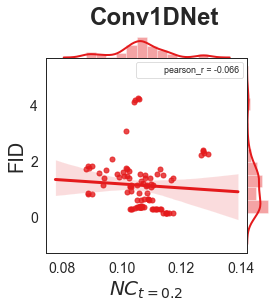

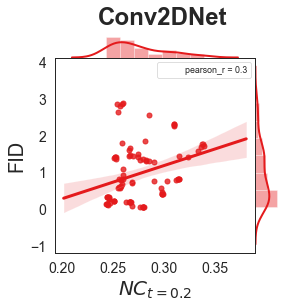

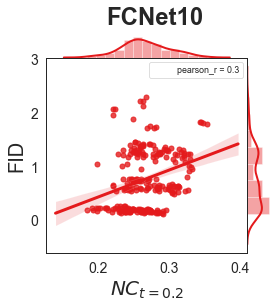

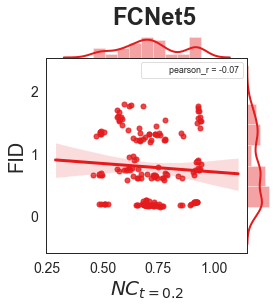

In [25]:
sns.set_palette(sns.color_palette("Set1"))
# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'fid_score_2048']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "fid_score_2048", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,)

        ax.set_axis_labels('$NC_{t=0.2}$', 'FID') 

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig(root_dir + 'imgs/nc_020+fid+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: -0.10858811440911291
Model: ResNet56        Attack: cw_div4_attack            Correlation: -0.4512744876161993
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: -0.07864980838542543
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: 0.0217496674916858
Model: FCNet10         Attack: cw_div4_attack            Correlation: 0.6962068308518365
Model: FCNet5          Attack: cw_div4_attack            Correlation: -0.43013701824367384
Model: DenseNet121     Attack: pgd_attack                Correlation: 0.1800659784567839
Model: ResNet56        Attack: pgd_attack                Correlation: -0.07692446874958475
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: 0.17667627827560609
Model: Dave_orig       Attack: pgd_attack_reg            Correlation: 3.5348799109280124e-15
Model: Rambo           Attack: LinfPGDAttack_w_Diversity Correlation: 0.7437456881617919
Model: 

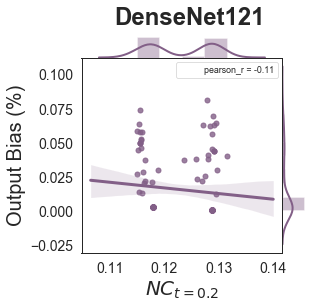

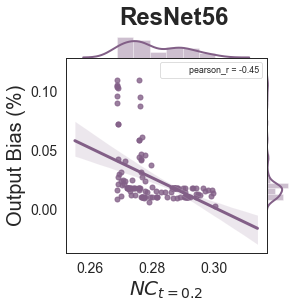

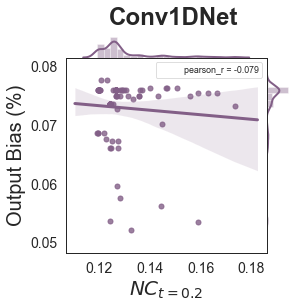

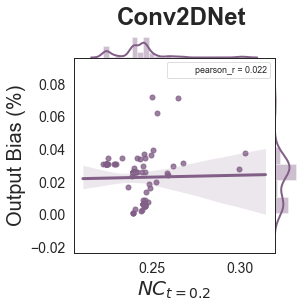

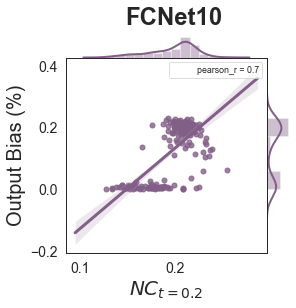

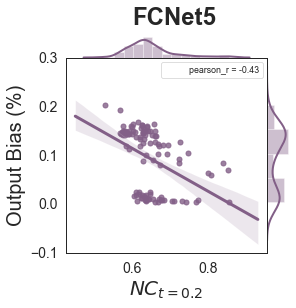

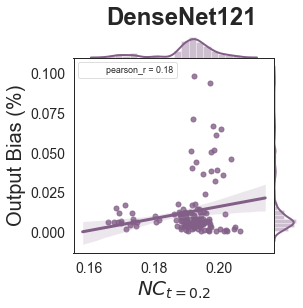

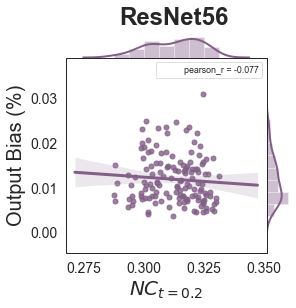

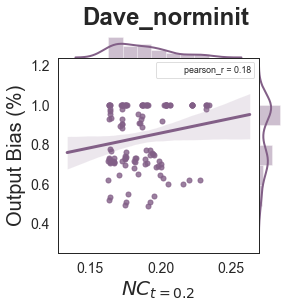

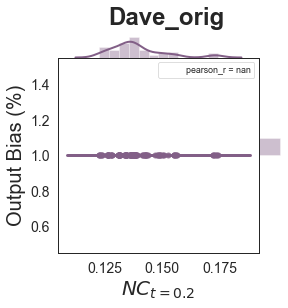

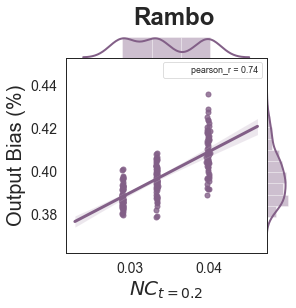

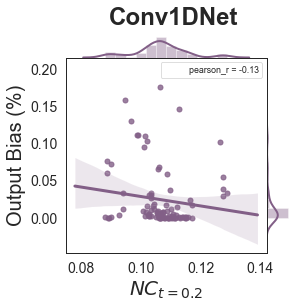

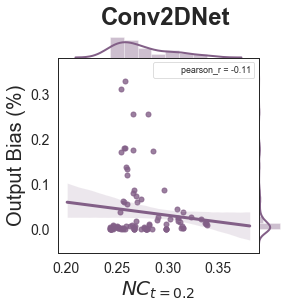

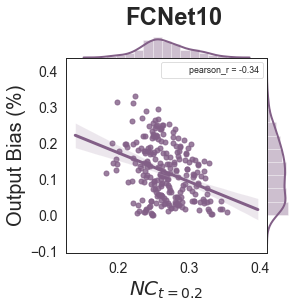

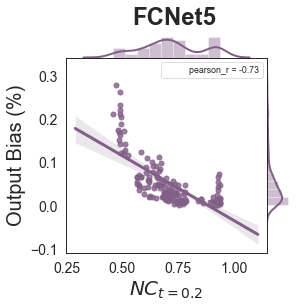

In [26]:
colors = ["dusty purple", "windows blue", "amber", "greyish", "faded green"]
sns.set_palette(sns.xkcd_palette(colors))

# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]
    
    corr = data[['neuron_coverage_020', 'output_bias']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "output_bias", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r)
        
        ax.set_axis_labels('$NC_{t=0.2}$', 'Output Bias (%)')
        
        plt.suptitle(t=model, weight='bold')
        
        ax.savefig(root_dir + 'imgs/nc_020+ob+'+model+'+'+attack+'.png')